MIT License

Copyright (c) 2024 SoumyaNayakk

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[1] M. Zaghloula, "Hepatitis C Prediction," Kaggle, Available: https://www.kaggle.com/code/mohamedzaghloula/hepatitis-c-prediction

[2]aiskunks. (2023). A Crash Course in Statistical Learning - AutoML - CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb. GitHub. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

[3] Logistic regression, hyperparameter tuning, and regularization were referenced based on information obtained from browsing on ChatGPT.
[4] H20.ai- https://docs.h2o.ai/


 # Hyperparameter Tuning and Regularization in Logistic Regression for Disease Classification

**Abstract:**
Logistic regression is a widely used classification algorithm in the medical domain for disease diagnosis. However, optimizing its performance by tuning hyperparameters and applying regularization techniques is crucial for achieving accurate predictions. In this study, we employed cross-validation and grid search techniques to systematically tune the alpha hyperparameter in Ridge regularization, aiming to find the optimal balance between bias and variance in the model. Our results indicate that an alpha value of 0.001 yielded the highest F1-score of 0.526 during cross-validation. Subsequently, applying this optimal alpha value to the test set produced an F1-score of 0.455, demonstrating the effectiveness of the tuned hyperparameter in enhancing model performance. Furthermore, we evaluated the impact of regularization on feature importance and identified significant variables for disease classification. Our findings underscore the importance of hyperparameter tuning and regularization in logistic regression models, emphasizing the need for careful optimization to achieve accurate disease classification in medical applications.


# Dataset

The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data
Content
All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:

1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
Attributes 5 to 14 refer to laboratory data:
5. ALB: Albumin level
6. ALP: Alkaline phosphatase level
7. ALT: Alanine transaminase level
8. AST: Aspartate transaminase level
9. BIL: Bilirubin level
10. CHE: Acetylcholinesterase level
11. CHOL: Cholesterol level
12. CREA: Creatinine level
13. GGT: Gamma-glutamyl transferase level
14. PROT: Total protein level

The target attribute for classification is Category






In [318]:
pip install h2o


In [319]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import random, os, sys
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pylab
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_curve, auc
from h2o.estimators.glm import H2OGeneralizedLinearEstimator


In [320]:
min_mem_size=6
run_time=222

In [321]:
import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = max(6, int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)))
print(min_mem_size)

6


In [322]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:12205..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9dqts4mi
  JVM stdout: /tmp/tmp9dqts4mi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9dqts4mi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:12205
Connecting to H2O server at http://127.0.0.1:12205 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_bo5wih
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [323]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df = pd.read_csv(github_url)
df_h2o = h2o.H2OFrame(df)
df_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69
0=Blood Donor,32,m,38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5
0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3
0=Blood Donor,32,m,43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91,74
0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5
0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.6,109,21.5,67.1
0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.1,83,13.7,71.3
0=Blood Donor,32,m,42.4,86.3,20.3,20,35.2,5.46,4.45,81,15.9,69.9


In [324]:
# Check for missing values
missing_values = df_h2o.isna().sum()

# Print the missing values count
print(missing_values)


0.0


In [325]:
# Print the size of the H2O DataFrame
print("Number of rows:", df_h2o.shape[0])
print("Number of columns:", df_h2o.shape[1])

Number of rows: 611
Number of columns: 13


In [326]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df_h2o.split_frame([pct_rows])

In [327]:
print(df_train.shape)
print(df_test.shape)

(482, 13)
(129, 13)


In [328]:
#Display all columns in X
X=df_h2o.columns
print(X)

['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [329]:
#Seperate Dependent variable from Independent variable
y ='Category'
X.remove(y)
print(X)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [330]:
# Set up AutoML for binary classification with stopping metrics
aml = H2OAutoML(max_runtime_secs=run_time, seed=1, stopping_metric='AUC')

# Train AutoML on your data
aml.train(x=X, y=y, training_frame=df_train)

# Get the leaderboard
leaderboard = aml.leaderboard

# Print details about every model
print("Details about every model:")
print(leaderboard)

# Get the best model from AutoML
best_model = aml.leader
print("\nBest model:")
print(best_model)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Details about every model:
model_id                             mean_per_class_error    logloss      rmse       mse
XGBoost_1_AutoML_1_20240220_14119                0.584444   0.266519  0.286527  0.082098
[1 row x 5 columns]


Best model:
Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240220_14119


Model Summary: 
    number_of_trees
--  -----------------
    875

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.05489826869405197
RMSE: 0.23430379573120869
LogLoss: 0.17329332006590875
Mean Per-Class Error: 0.45666666666666667
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 

In [331]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df_pd = pd.read_csv(github_url)

In [332]:
#assigning numeric values to categorical data
df_pd['Category'] = df_pd['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df_pd['Sex'] = df_pd['Sex'].map({'m': 1, 'f': 0})

In [333]:
#Dopping the unecessary features as discussed above
df_pd=df_pd.drop([ "BIL",  "CHOL","CREA", "GGT", "PROT",], axis=1)

In [334]:
#Calculating correlation matrix for all variables
df_pd.corr()

,Category,Age,Sex,ALB,ALP,ALT,AST,CHE
Category,1.000000,0.028438,0.067822,-0.179928,-0.061605,0.086385,0.622991,-0.230806
Age,0.028438,1.000000,-0.032638,-0.194932,0.174853,-0.010118,0.084875,-0.072785
Sex,0.067822,-0.032638,1.000000,0.147666,-0.014280,0.160942,0.128054,0.172838
ALB,-0.179928,-0.194932,0.147666,1.000000,-0.137874,0.003737,-0.193281,0.376480
ALP,-0.061605,0.174853,-0.014280,-0.137874,1.000000,0.174719,0.065238,0.033348
ALT,0.086385,-0.010118,0.160942,0.003737,0.174719,1.000000,0.272672,0.147446
AST,0.622991,0.084875,0.128054,-0.193281,0.065238,0.272672,1.000000,-0.207674
CHE,-0.230806,-0.072785,0.172838,0.376480,0.033348,0.147446,-0.207674,1.000000


Text(0.5, 1.0, 'Variable Correlation')

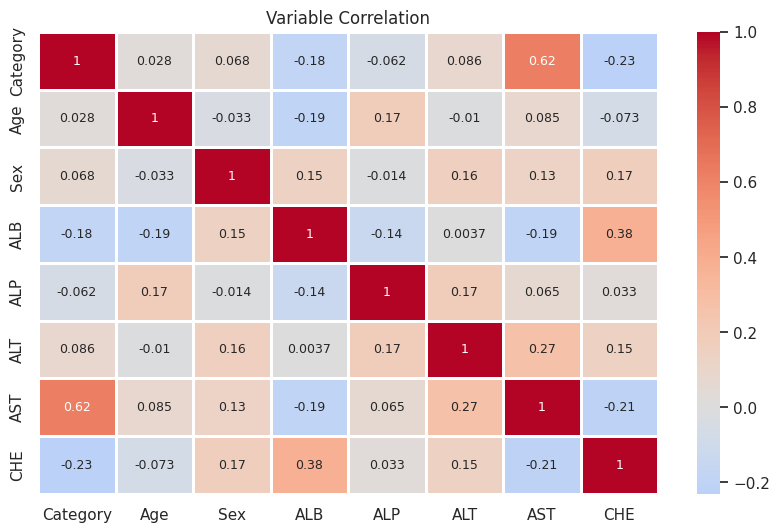

In [335]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(df_pd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')


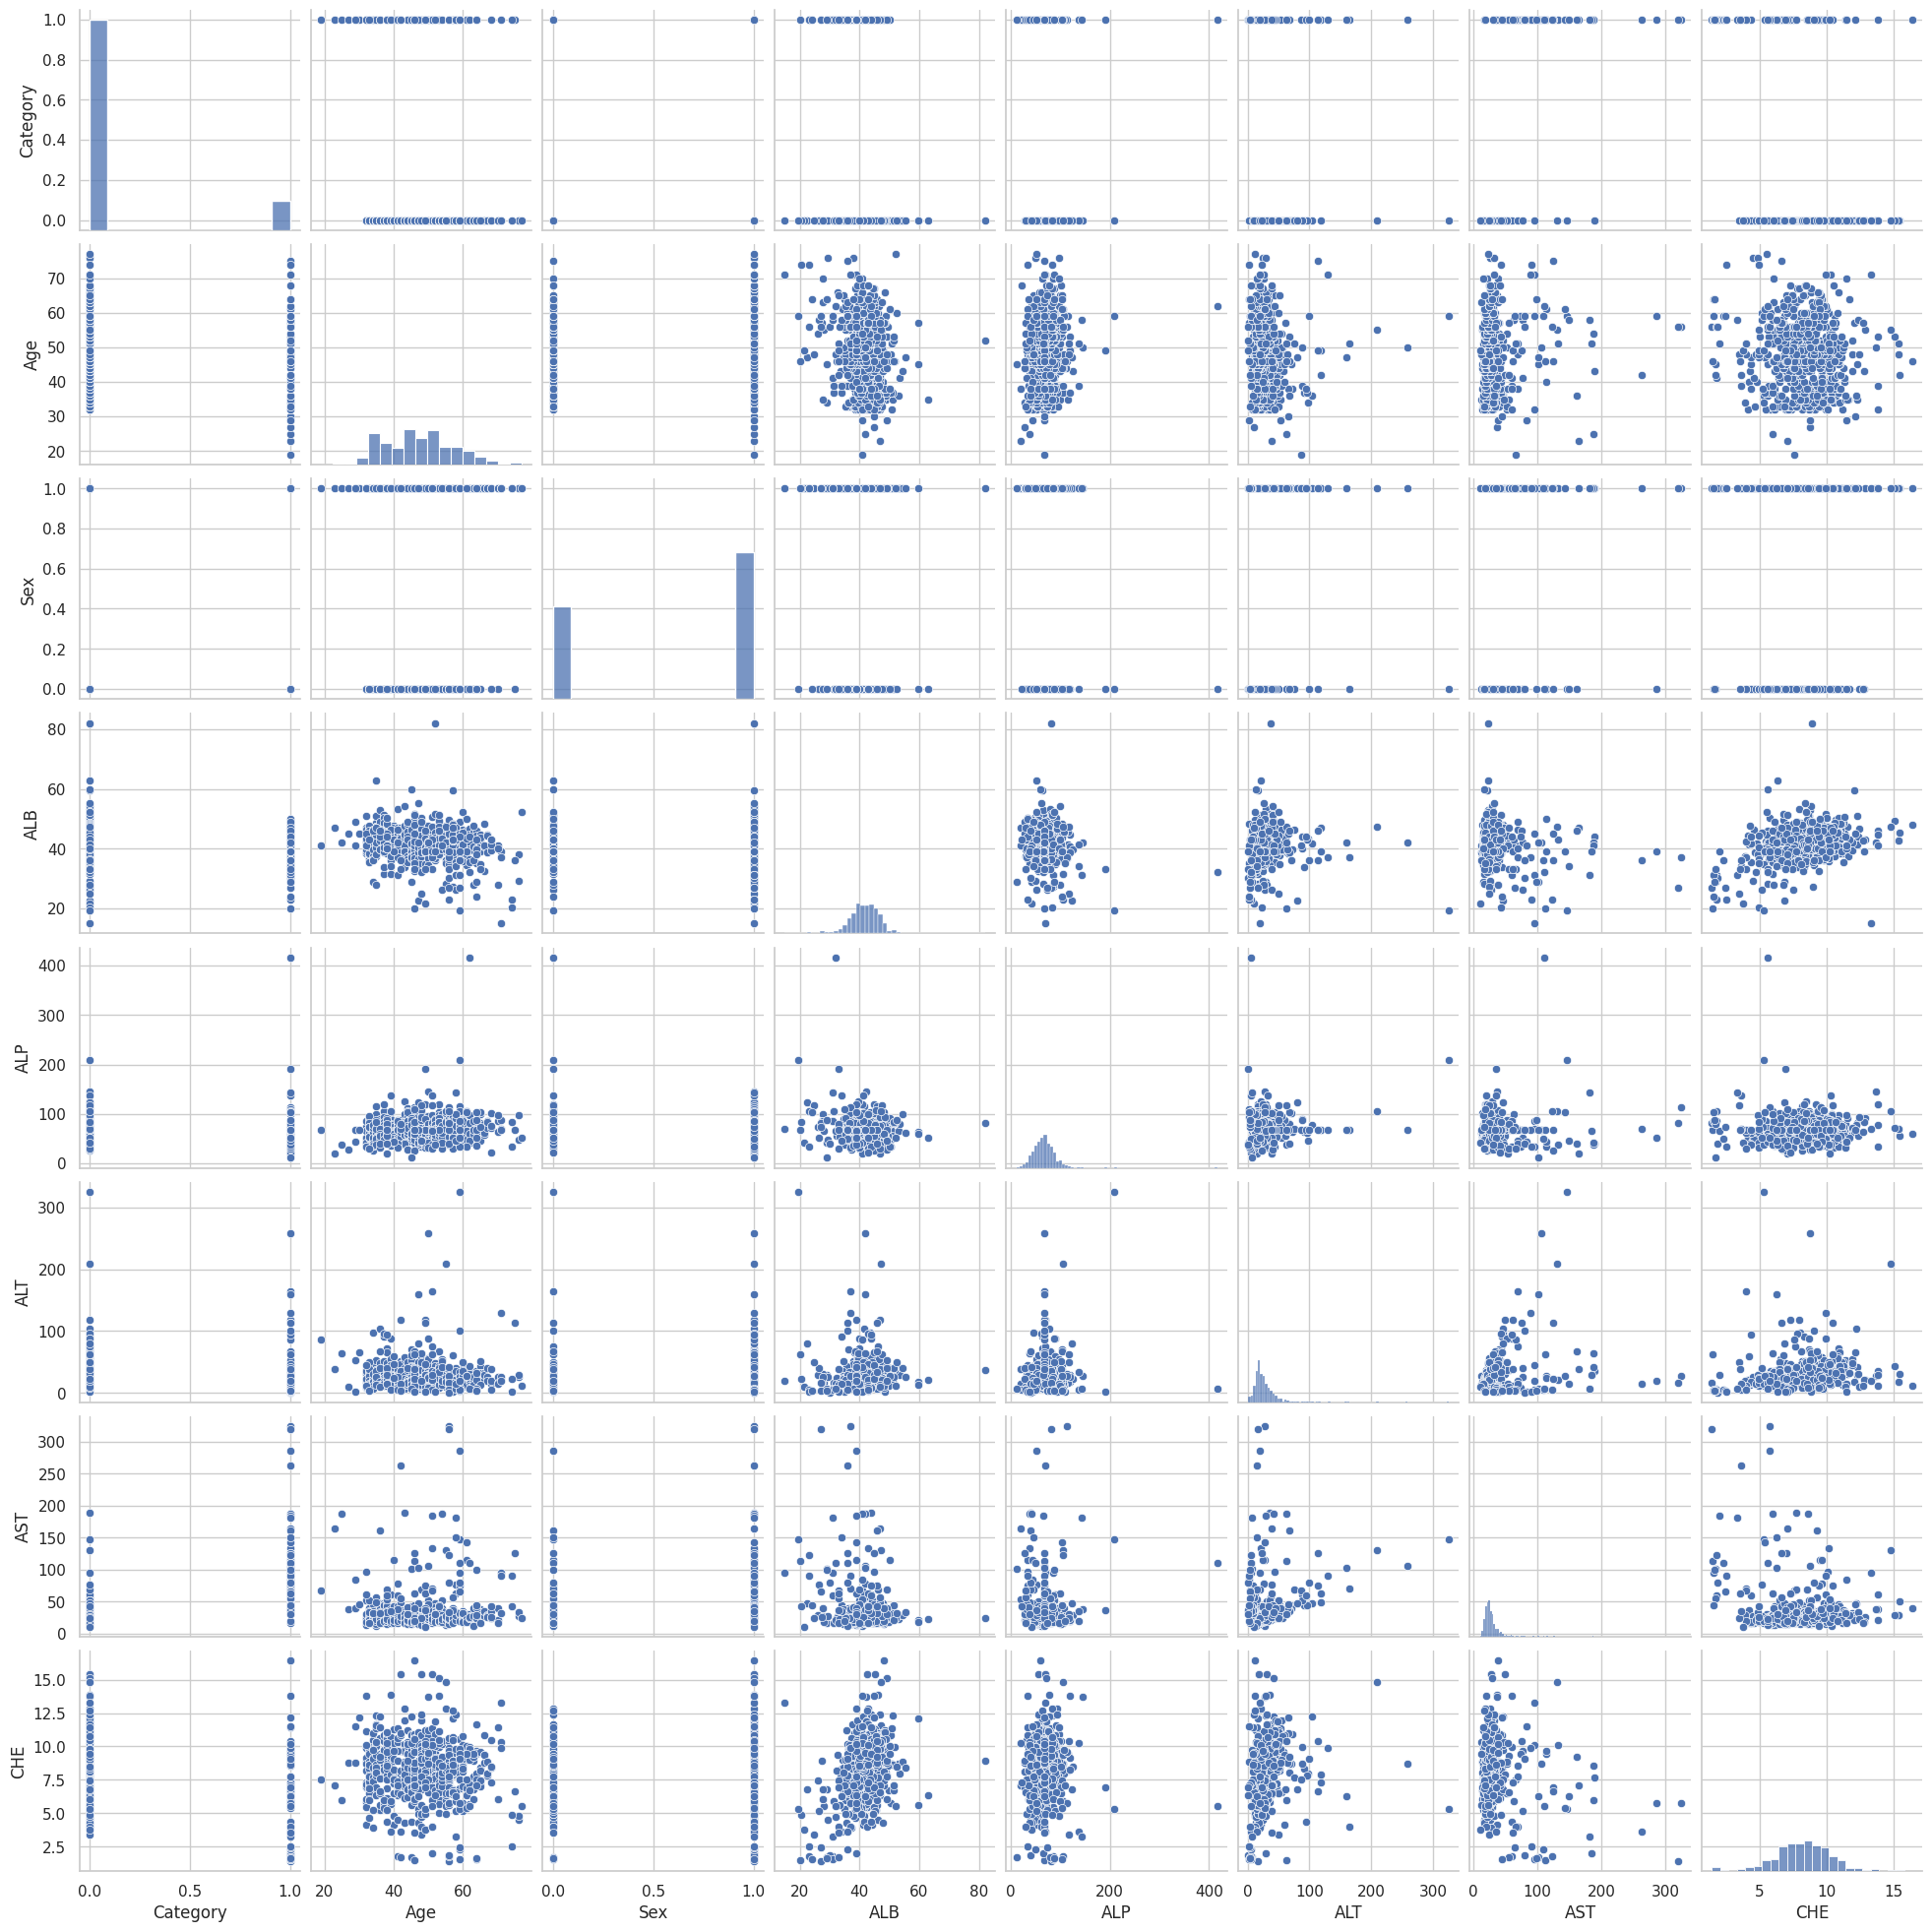

In [336]:
sns.pairplot(df_pd)

In [337]:
#H20 AutoML Rexecution on new model

In [338]:
#AST, ALT, CHE, ALP, ALB seem to be the most significant predictors based on their relative importance

In [339]:
#Dopping the unecessary features as discussed above
df_h2o1=df_h2o.drop([ "BIL",  "CHOL","CREA", "GGT", "PROT",], axis=1)

In [340]:
df_h2o1

Category,Age,Sex,ALB,ALP,ALT,AST,CHE
0=Blood Donor,32,m,38.5,52.5,7.7,22.1,6.93
0=Blood Donor,32,m,38.5,70.3,18,24.7,11.17
0=Blood Donor,32,m,46.9,74.7,36.2,52.6,8.84
0=Blood Donor,32,m,43.2,52,30.6,22.6,7.33
0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.15
0=Blood Donor,32,m,41.6,43.3,18.5,19.7,9.92
0=Blood Donor,32,m,46.3,41.3,17.5,17.8,7.01
0=Blood Donor,32,m,42.2,41.9,35.8,31.1,5.82
0=Blood Donor,32,m,50.9,65.5,23.2,21.2,8.69
0=Blood Donor,32,m,42.4,86.3,20.3,20,5.46


In [341]:

df_h2o1_train, df_h2o1_test = df_h2o1.split_frame([pct_rows])

In [342]:
X1=df_h2o1.columns
print(X1)

['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'CHE']


In [343]:
#Seperate Dependent variable from Independent variable
y1 ='Category'
X1.remove(y1)
print(X1)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'CHE']


In [344]:
# Set up AutoML for binary classification with stopping metrics
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1, stopping_metric='AUC')

# Train AutoML on your data
aml1.train(x=X1, y=y1, training_frame=df_h2o1_train)

# Get the leaderboard
leaderboard = aml1.leaderboard

# Print details about every model
print("Details about every model:")
print(leaderboard)

# Get the best model from AutoML
best_model = aml1.leader
print("\nBest model:")
print(best_model)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Details about every model:
model_id                                                  mean_per_class_error    logloss      rmse        mse
DRF_1_AutoML_2_20240220_14754                                         0.382054   0.322028  0.245791  0.0604132
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_14754                0.412875   0.322503  0.272158  0.0740702
XRT_1_AutoML_2_20240220_14754                                         0.413286   0.663316  0.253394  0.0642085
XGBoost_2_AutoML_2_20240220_14754                                     0.431975   0.201804  0.247152  0.061084
GBM_5_AutoML_2_20240220_14754                                         0.434258   0.253179  0.256417  0.0657495
GBM_4_AutoML_2_20240220_14754                                         0.447612   0.384153  0.251364  0.063184
XGBoost_3_AutoML_2_20240220_14754                                     0.460004   0.189274  0.240001  0.

#Best Model


1. **Mean Per-Class Error (Cross-validation):** The GBM model achieves a mean per-class error of approximately 0.371. This means, on average, the model misclassifies about 37.1% of instances across all classes. Lower values indicate better performance, suggesting that the GBM model is more accurate in classifying each class compared to other models.

2. **LogLoss (Cross-validation):** With a LogLoss of around 0.239, the GBM model demonstrates its ability to provide well-calibrated probabilities. LogLoss penalizes incorrect classifications based on the confidence of the prediction. Lower LogLoss values indicate better predictive performance. In this case, the GBM models LogLoss is relatively low, indicating that it can make predictions with high confidence and accuracy.

3. **RMSE (Cross-validation):** The GBM model achieves an RMSE of approximately 0.230. RMSE measures the average magnitude of the errors between predicted and actual values. In this context, it indicates the average deviation of the predicted probabilities from the actual class labels. Lower RMSE values suggest better predictive accuracy. Thus, the GBM models RMSE indicates that it provides more accurate predictions compared to other models.

4. **MSE (Cross-validation):** The MSE for the GBM model is approximately 0.053. MSE is another measure of predictive accuracy, calculated as the average of the squared differences between predicted and actual values. Lower MSE values indicate better model performance. The GBM model's MSE suggests that it provides more accurate predictions compared to alternative models.

5. **Variable Importances:** The model's variable importances provide insights into the features that contribute most to the model's predictive performance. In this case, the features 'AST', 'ALT', 'CHE', 'ALP', and 'ALB' are among the most important features, indicating their strong influence on the models predictions. This information can be valuable for feature selection and understanding the underlying factors driving the predictions.

6. **Scoring History:** The scoring history reveals the model's performance as the training progresses. In this case, we can observe that as the number of trees in the GBM model increases, the RMSE decreases. This trend signifies that the model's performance improves with additional trees, indicating its ability to learn complex patterns in the data effectively.

In summary, the GBM model's superior performance across various metrics, including mean per-class error, LogLoss, RMSE, and MSE, along with its robust variable importances and performance trends, highlight its effectiveness in accurately predicting the target variable compared to other models generated by the AutoML process.

In [345]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'DRF_1_AutoML_2_20240220_14754': 0, 'GLM_1_AutoML_2_20240220_14754': 11}

In [346]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


In [347]:

best_model1.algo

'drf'

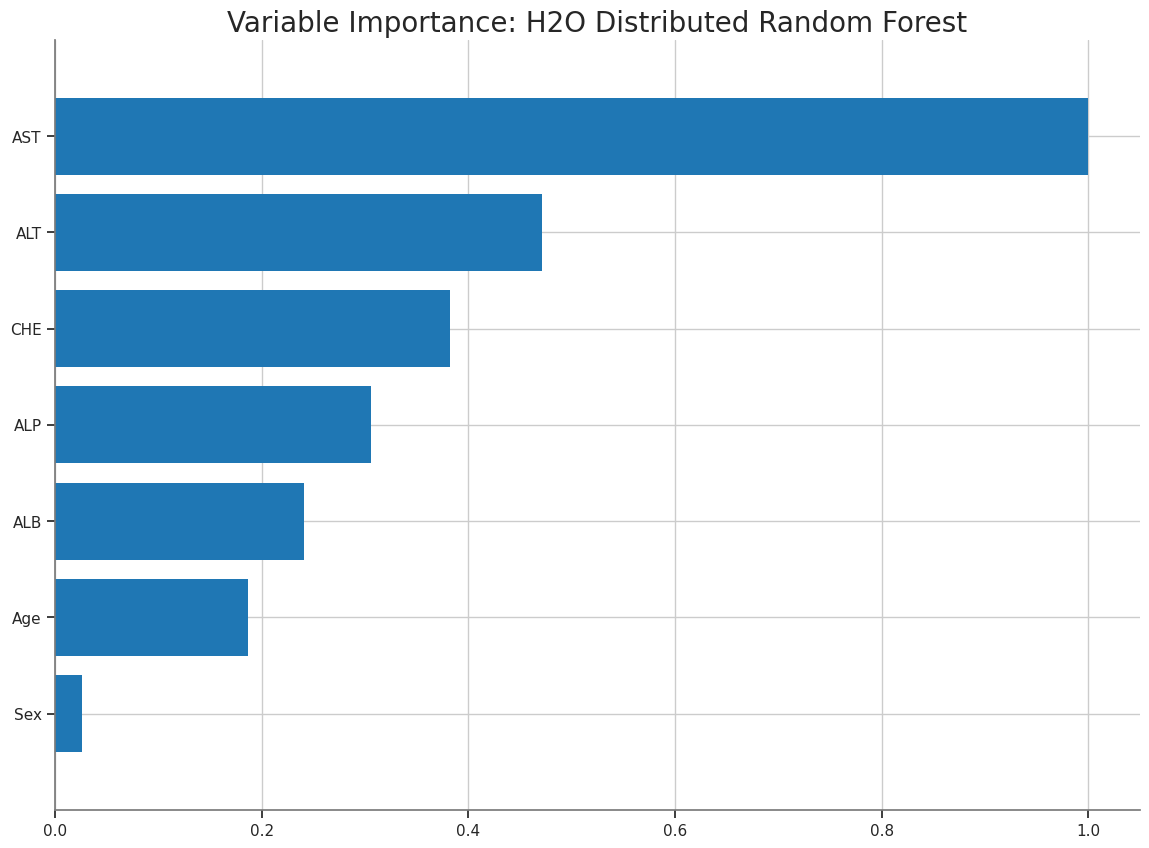

<Figure size 640x480 with 0 Axes>

In [348]:
if best_model1.algo in ['gbm', 'drf', 'xrt']:
    best_model1.varimp_plot()

11
glm


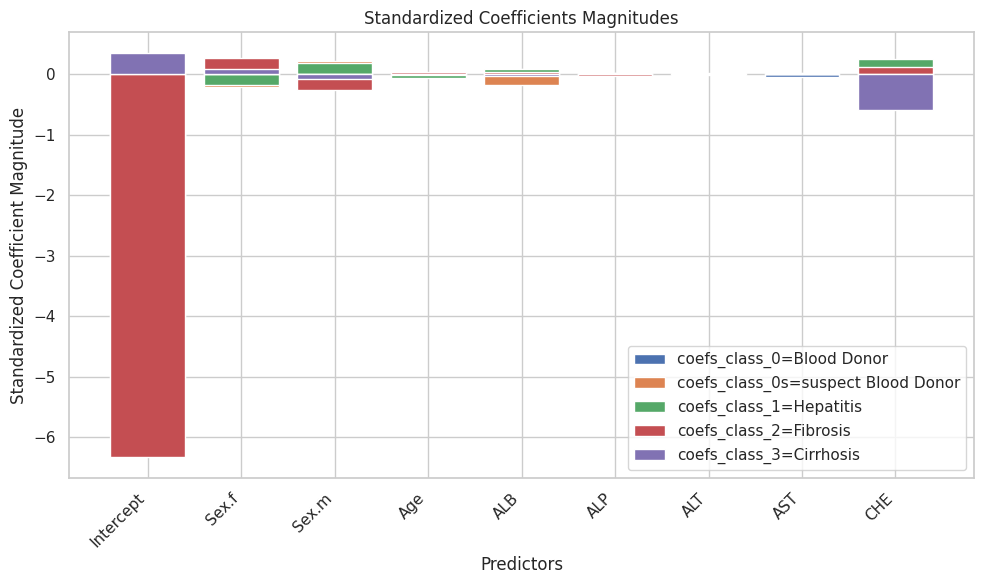

In [349]:
if glm_index != 0:
    print(glm_index)
    glm_model1 = h2o.get_model(aml1.leaderboard[glm_index, 'model_id'])
    print(glm_model1.algo)
    coefficients = glm_model1.coef()

    # Plot the magnitudes of the standardized coefficients for each class
    plt.figure(figsize=(10, 6))
    for class_name, class_coefficients in coefficients.items():
        names = list(class_coefficients.keys())
        standardized_coefficients = list(class_coefficients.values())
        plt.bar(x=names, height=standardized_coefficients, label=class_name)

    plt.xlabel('Predictors')
    plt.ylabel('Standardized Coefficient Magnitude')
    plt.title('Standardized Coefficients Magnitudes')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [350]:
#checking if assumptions are violated

In [351]:
#Seperating the predictor and target variables
A=df_pd.drop(['Category'],axis=1)
B=df_pd['Category']

In [352]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [353]:
# Selecting columns for training
cols1 = ["ALB", "ALP", "ALT", "AST",  "CHE",]

# Selecting features and target variable
X_train = A_train[cols1]
y_train = b_train

# Create a pipeline for scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic', LogisticRegression())  # Logistic Regression model
])

# Fit the model
model1 = pipeline.fit(X_train, y_train)

In [354]:
b_pred = model1.predict(A_train[cols1])

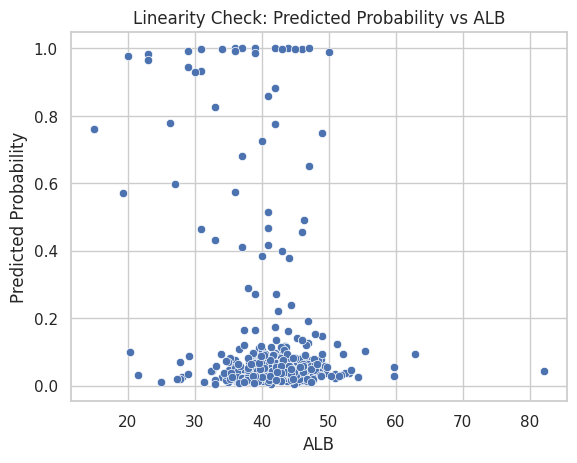

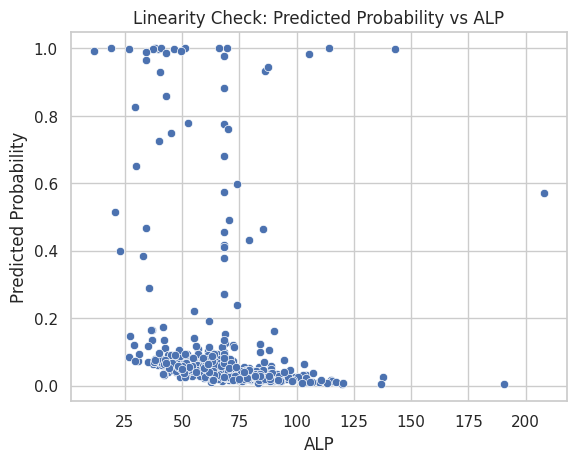

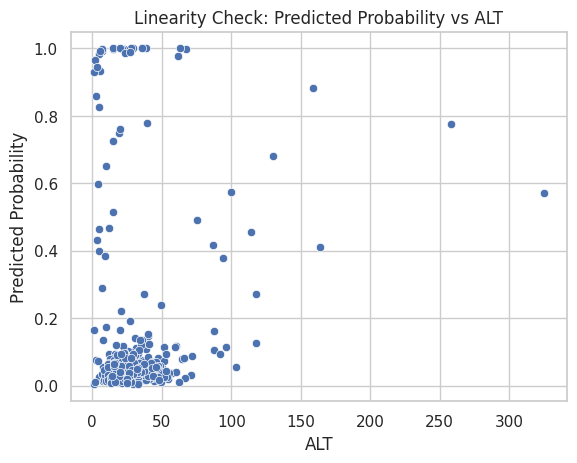

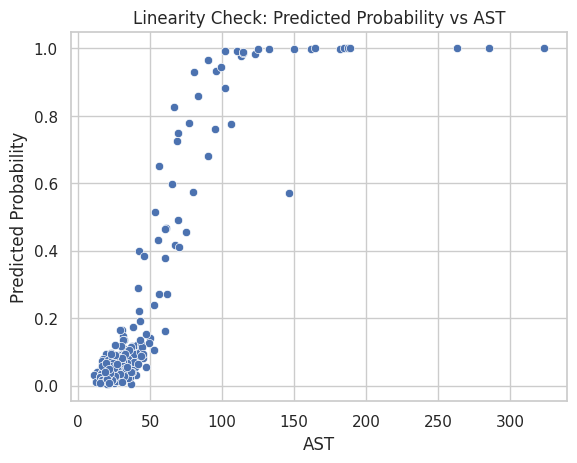

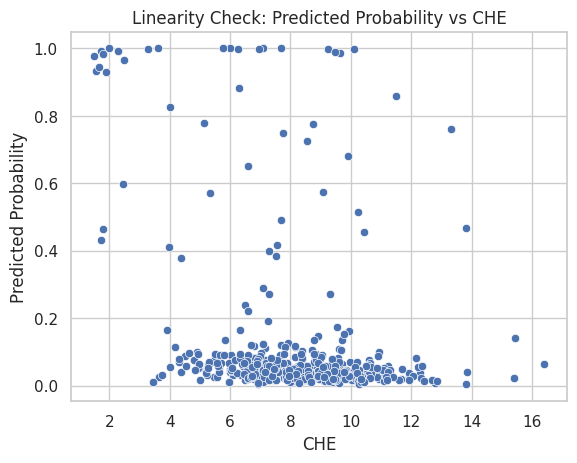

Variance Inflation Factors:
  Feature        VIF
0     ALB  21.348272
1     ALP   9.764904
2     ALT   2.581704
3     AST   2.246984
4     CHE  17.183535
Model Performance Metrics:
Accuracy: 0.92
Precision: 0.88
Recall: 0.44
F1-score: 0.58
ROC AUC Score: 0.92
Confusion Matrix:
[[106   1]
 [  9   7]]


In [355]:

# Fit logistic regression model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

model.fit(A_train[cols1], b_train)

# Assess linearity: Plot predicted probabilities against independent variables
predicted_probabilities = model.predict_proba(A_train[cols1])[:, 1]
for col in cols1:
    sns.scatterplot(x=A_train[col], y=predicted_probabilities)
    plt.xlabel(col)
    plt.ylabel('Predicted Probability')
    plt.title(f'Linearity Check: Predicted Probability vs {col}')
    plt.show()

# Check for multicollinearity: Calculate VIF
vif_data = A_train[cols1]
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
print("Variance Inflation Factors:")
print(vif)

# Analyze model performance
b_pred = model.predict(A_test[cols1])
accuracy = accuracy_score(b_test, b_pred)
precision = precision_score(b_test, b_pred)
recall = recall_score(b_test, b_pred)
f1 = f1_score(b_test, b_pred)
roc_auc = roc_auc_score(b_test, model.predict_proba(A_test[cols1])[:, 1])
conf_matrix = confusion_matrix(b_test, b_pred)

print("Model Performance Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("ROC AUC Score: {:.2f}".format(roc_auc))
print("Confusion Matrix:")
print(conf_matrix)


Based on the provided Variance Inflation Factors (VIF) and the model performance metrics, let's analyze whether the assumptions of logistic regression are violated:

**Variance Inflation Factors (VIF):** VIF values greater than 10 are often considered indicative of multicollinearity issues.
In this case, the VIF for "ALB" and "CHE" are notably high, indicating potential multicollinearity issues with these variables.
Model Performance Metrics:

**Accuracy:**
The accuracy of the model is 92%, indicating a high proportion of correctly classified instances.

**Precision:**
The precision of the model is 88%, indicating that when the model predicts a positive class, it is correct 88% of the time.

**Recall:** The recall of the model is 44%, indicating that the model correctly identifies only 44% of the positive instances.


**F1-score:** The F1-score of the model is 58%, which is the harmonic mean of precision and recall.


**ROC AUC Score:** The ROC AUC score of the model is 92%, indicating good discriminatory power.


**Confusion Matrix:** The confusion matrix provides a detailed breakdown of the model's predictions. There are some false negatives (9 instances) and false positives (1 instance).
#Based on these observations:

**Multicollinearity:** The high VIF values for "ALB" and "CHE" suggest potential multicollinearity issues. Multicollinearity can affect the stability and interpretation of coefficients in logistic regression. It's advisable to address multicollinearity by either removing one of the correlated variables or by using techniques like ridge regression or LASSO regularization.

**Model Performance:** While the model's overall performance in terms of accuracy and ROC AUC score is good, the relatively low recall suggests that the model may not be effectively capturing all positive instances. This could be due to multicollinearity issues or other factors affecting model performance.

In summary, while the logistic regression model demonstrates good overall performance, the presence of multicollinearity and the relatively low recall indicate potential areas for improvement. Further investigation into the cause of multicollinearity and potential model refinements may be necessary to address these issues.

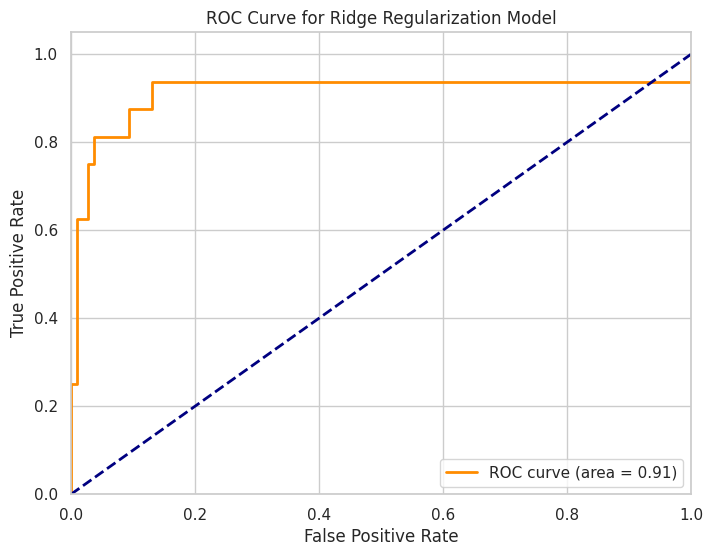

Ridge Regularization Model Performance Metrics:
Accuracy: 0.90
Precision: 0.83
Recall: 0.31
F1-score: 0.45
ROC AUC Score: 0.91
Confusion Matrix:
[[106   1]
 [ 11   5]]


In [356]:


# Fit the Ridge regularization model
ridge_pipeline.fit(A_train[cols1], b_train)

# Predict probabilities
y_scores_ridge = ridge_pipeline.decision_function(A_test[cols1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(b_test, y_scores_ridge)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ridge Regularization Model')
plt.legend(loc="lower right")
plt.show()

# Print model performance metrics
print("Ridge Regularization Model Performance Metrics:")
print("Accuracy: {:.2f}".format(accuracy_ridge))
print("Precision: {:.2f}".format(precision_ridge))
print("Recall: {:.2f}".format(recall_ridge))
print("F1-score: {:.2f}".format(f1_ridge))
print("ROC AUC Score: {:.2f}".format(roc_auc))
print("Confusion Matrix:")
print(conf_matrix_ridge)






In [357]:
#which independent features are significant

Optimization terminated successfully.
         Current function value: 0.186011
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Category   No. Observations:                  488
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                  0.4899
Time:                        01:51:46   Log-Likelihood:                -90.773
converged:                       True   LL-Null:                       -177.94
Covariance Type:            nonrobust   LLR p-value:                 8.672e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1140      1.901     -2.164      0.030      -7.840      -0.388
ALB            0.0365      0.

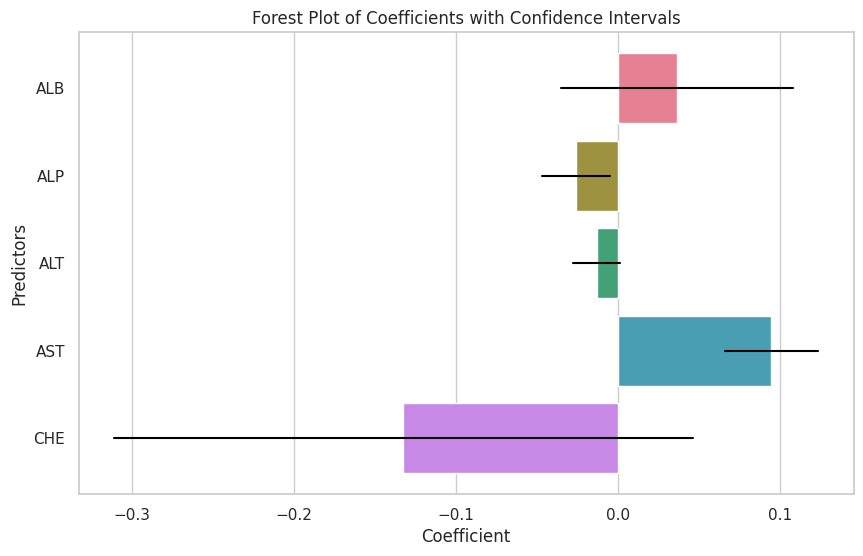

In [358]:

# Fit logistic regression model
logit_model = sm.Logit(b_train, sm.add_constant(A_train[cols1]))
result = logit_model.fit()

# Print summary
print(result.summary())

# Get coefficients and confidence intervals
coefficients = result.params[1:]
conf_int = result.conf_int()[1:]  # Get confidence intervals

# Plot forest plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=coefficients, y=coefficients.index, palette="husl", orient='h')

# Add confidence intervals
for i in range(len(coefficients)):
    plt.plot([conf_int.iloc[i, 0], conf_int.iloc[i, 1]], [i, i], color='black')

plt.xlabel('Coefficient')
plt.ylabel('Predictors')
plt.title('Forest Plot of Coefficients with Confidence Intervals')
plt.show()











In [359]:
#important hyperparameters

In [360]:


# Define the pipeline with scaler and Ridge classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeClassifier())
])

# Define the hyperparameters grid to search
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Different alpha values to try
}

# Define the scoring metric (F1-score in this case)
scoring = {'F1-score': make_scorer(f1_score)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='F1-score')
grid_search.fit(A_train[cols1], b_train)

# Get the best hyperparameters and corresponding performance
best_alpha = grid_search.best_params_['ridge__alpha']
best_f1_score = grid_search.best_score_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
b_pred_best = best_model.predict(A_test[cols1])
f1_score_best = f1_score(b_test, b_pred_best)

# Print the results
print("Best Alpha:", best_alpha)
print("Best F1-score (CV):", best_f1_score)
print("F1-score on Test Set (Best Model):", f1_score_best)


Best Alpha: 0.001
Best F1-score (CV): 0.5266666666666666
F1-score on Test Set (Best Model): 0.45454545454545453


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_14754,0.363509,0.321577,0.265206,0.070334,2033,0.448019,StackedEnsemble
GBM_3_AutoML_2_20240220_14754,0.363509,0.694336,0.290454,0.0843633,930,0.316992,GBM
GBM_2_AutoML_2_20240220_14754,0.363509,0.532506,0.2907,0.0845066,935,0.227759,GBM
GBM_4_AutoML_2_20240220_14754,0.413509,0.514573,0.287448,0.0826263,943,0.23733,GBM
GBM_1_AutoML_2_20240220_14754,0.521754,0.988176,0.261765,0.0685211,8488,1.7608,GBM
GBM_5_AutoML_2_20240220_14754,0.523509,0.262743,0.267378,0.0714909,106,0.031192,GBM
XRT_1_AutoML_2_20240220_14754,0.528421,0.905968,0.242387,0.0587514,98,0.015855,DRF
DRF_1_AutoML_2_20240220_14754,0.530175,0.292796,0.263039,0.0691897,206,0.029698,DRF
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_14754,0.555088,0.269133,0.285147,0.0813088,1003,0.123637,StackedEnsemble
XGBoost_1_AutoML_2_20240220_14754,0.561754,0.293797,0.274337,0.0752606,6232,0.095768,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_2_20240220_14754

0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis,Error,Rate
112.0,0.0,0.0,1.0,1.0,0.0175439,2 / 114
1.0,0.0,0.0,0.0,0.0,1.0,1 / 1
3.0,0.0,1.0,1.0,0.0,0.8,4 / 5
0.0,0.0,2.0,2.0,0.0,0.5,2 / 4
1.0,0.0,0.0,1.0,4.0,0.3333333,2 / 6
117.0,0.0,3.0,5.0,5.0,0.0846154,11 / 130


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

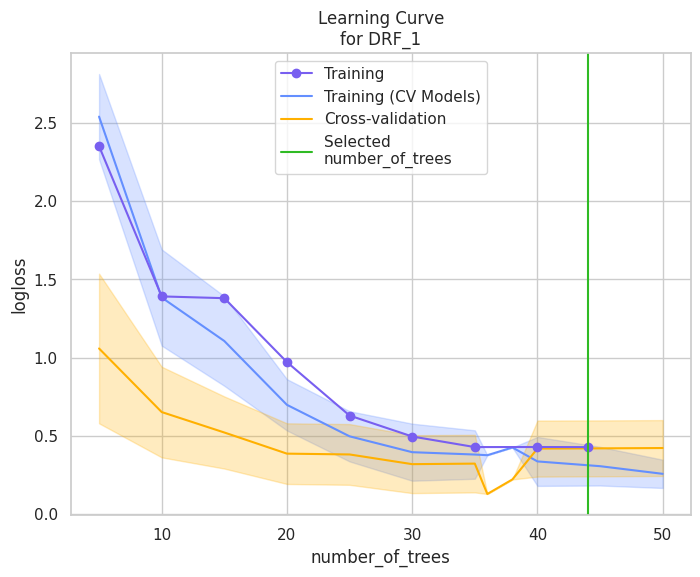

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

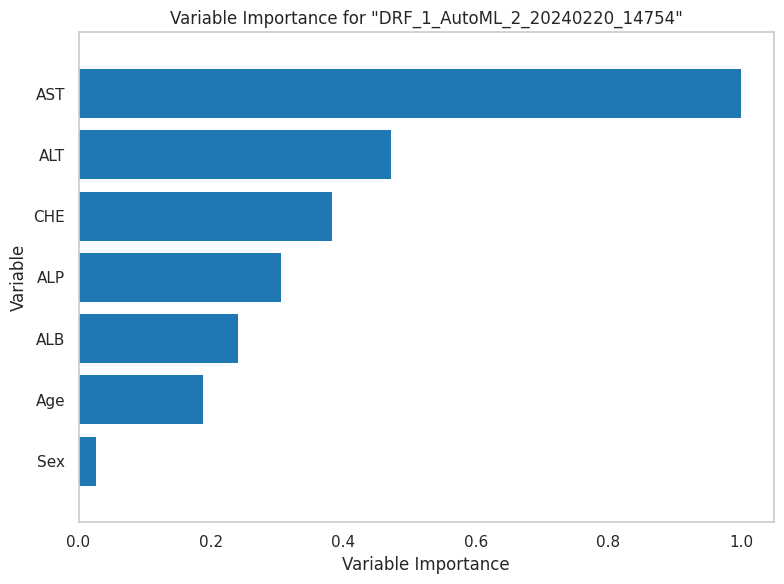

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

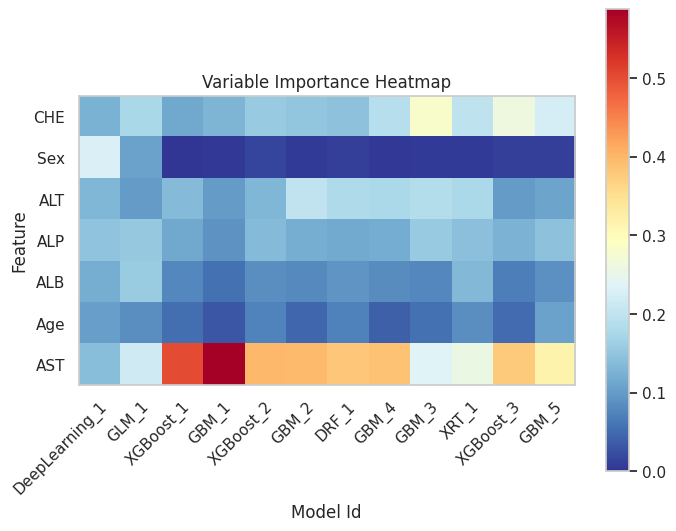

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

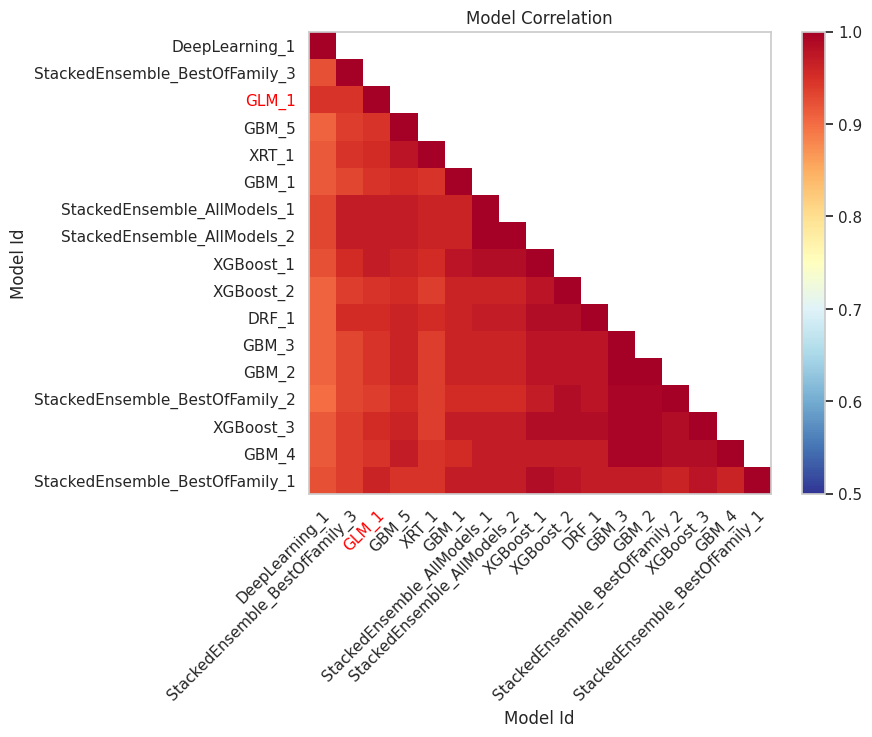

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

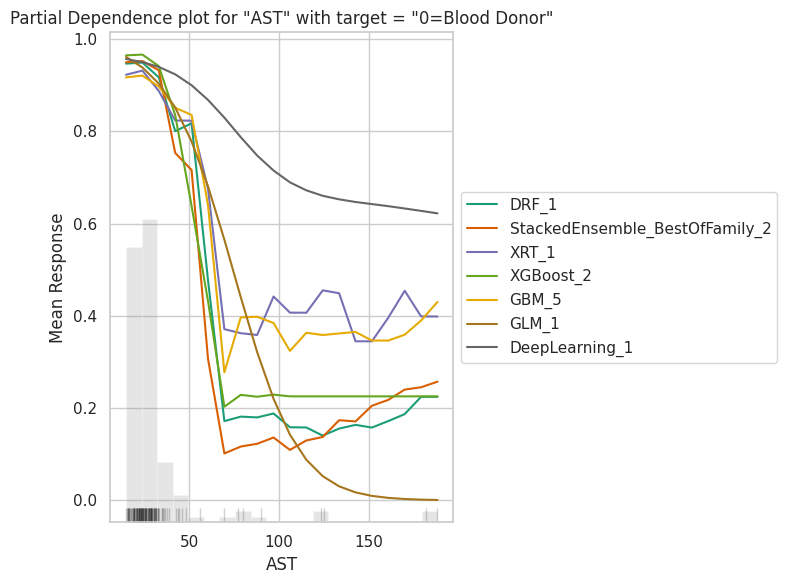

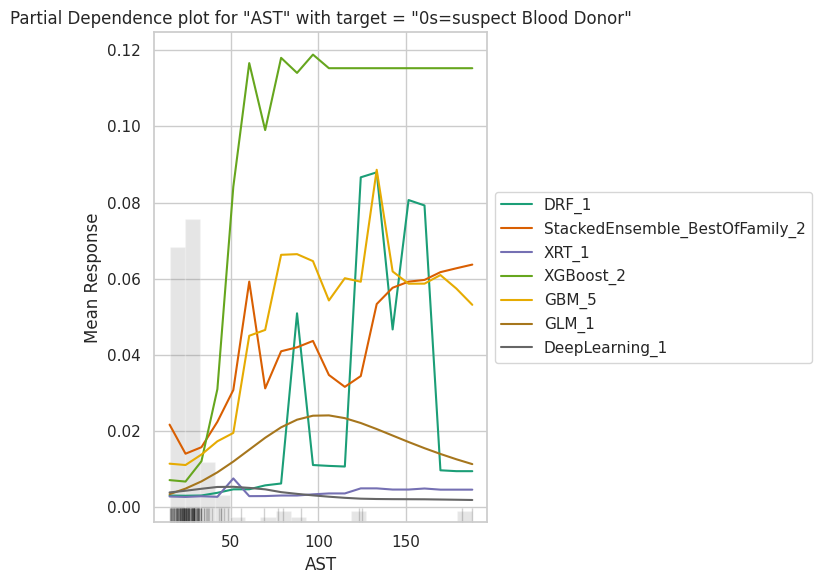

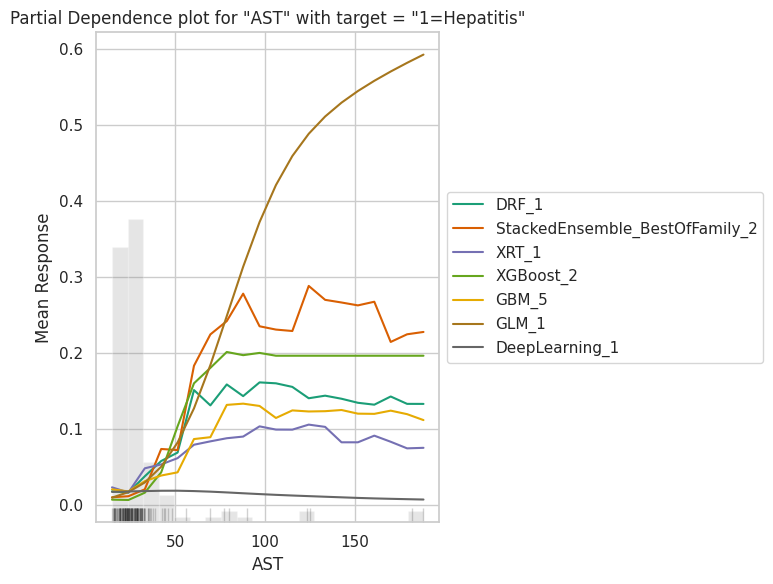

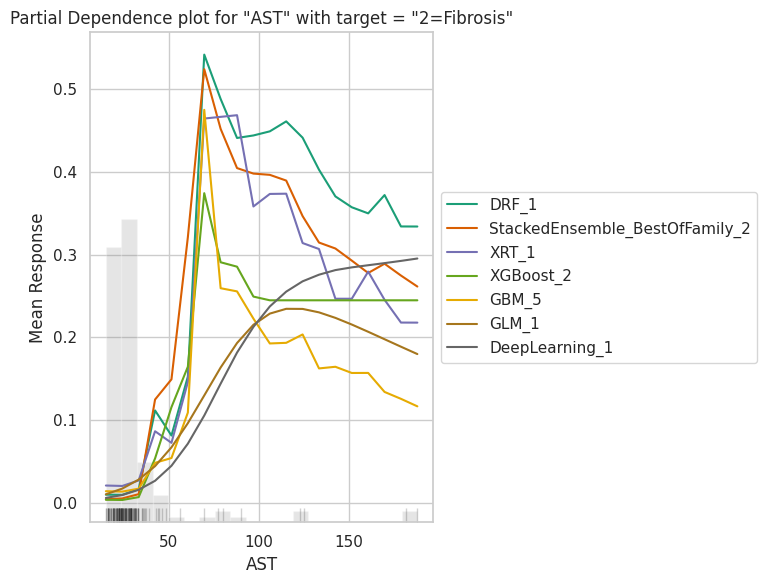

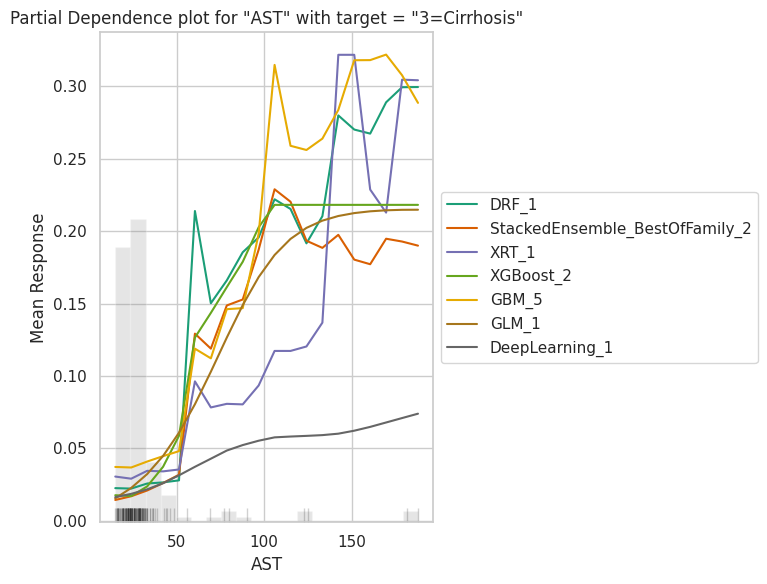

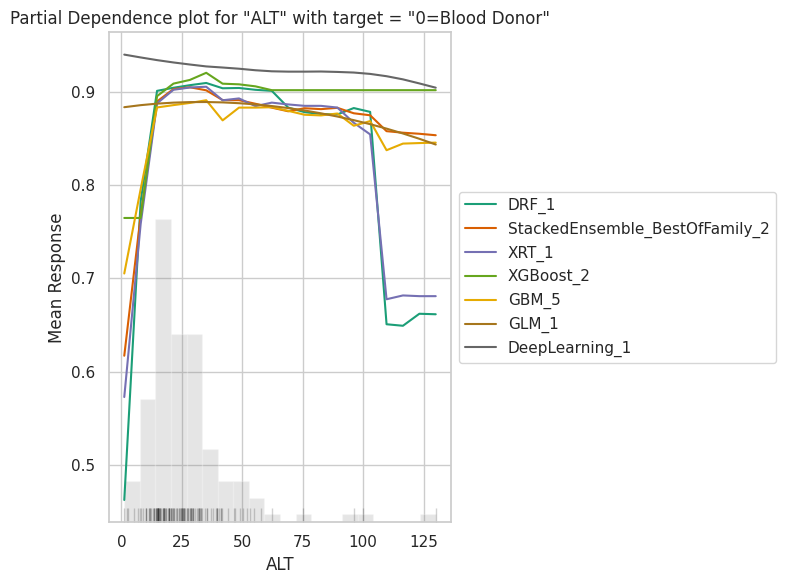

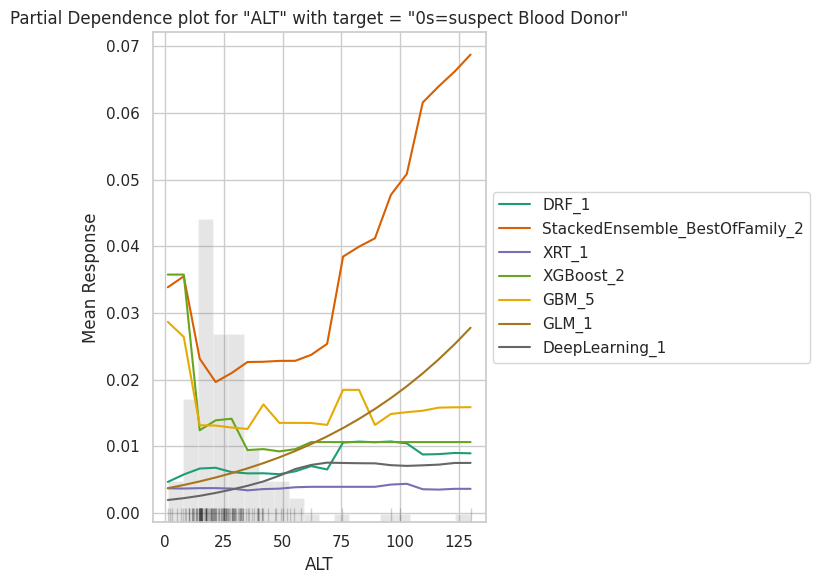

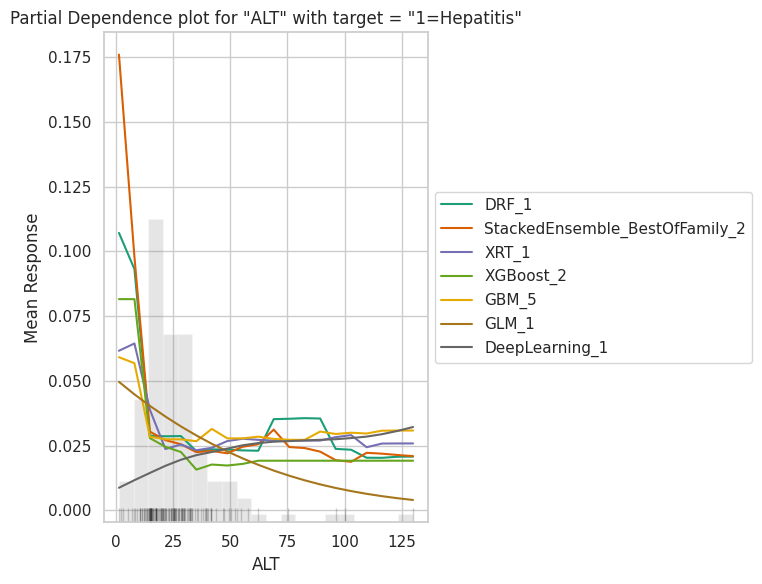

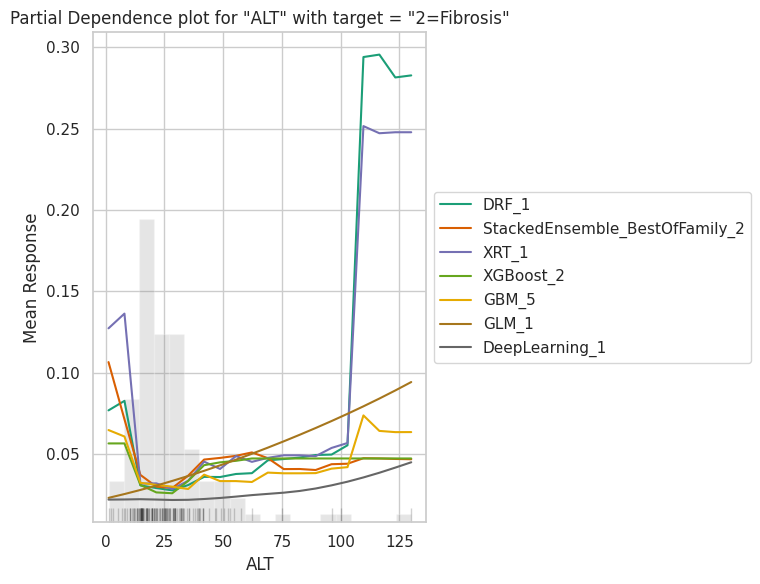

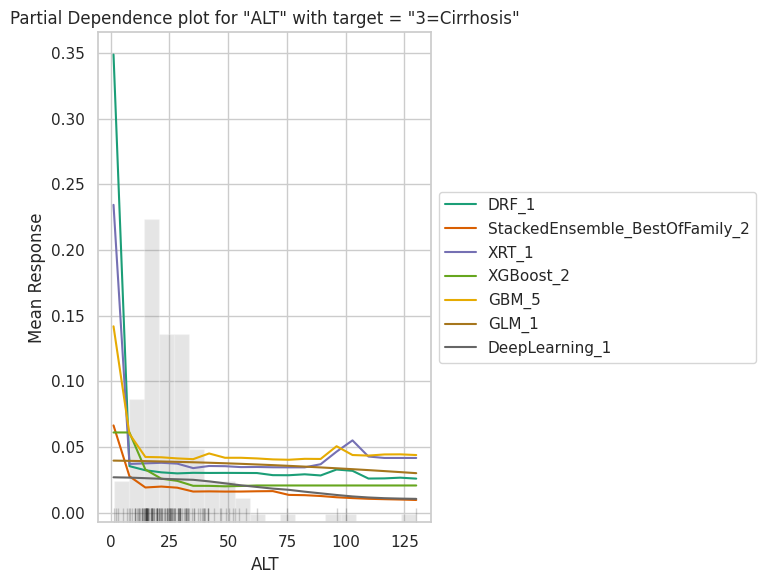

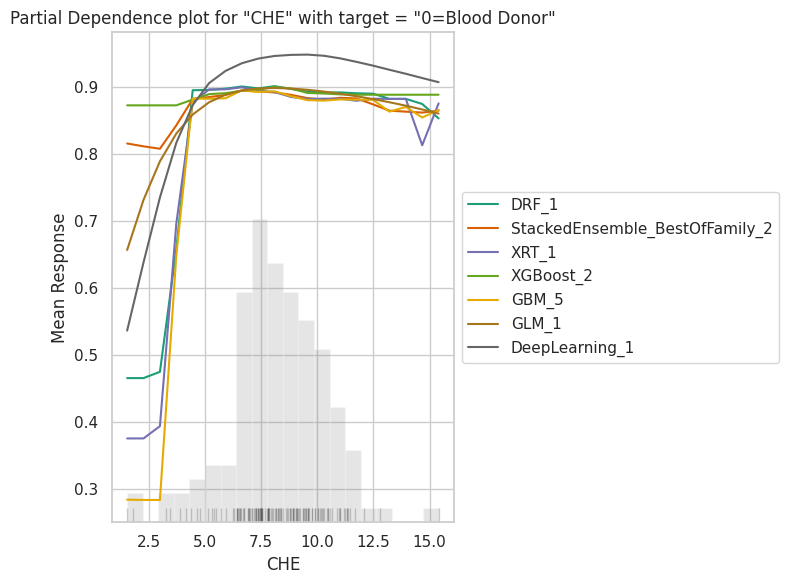

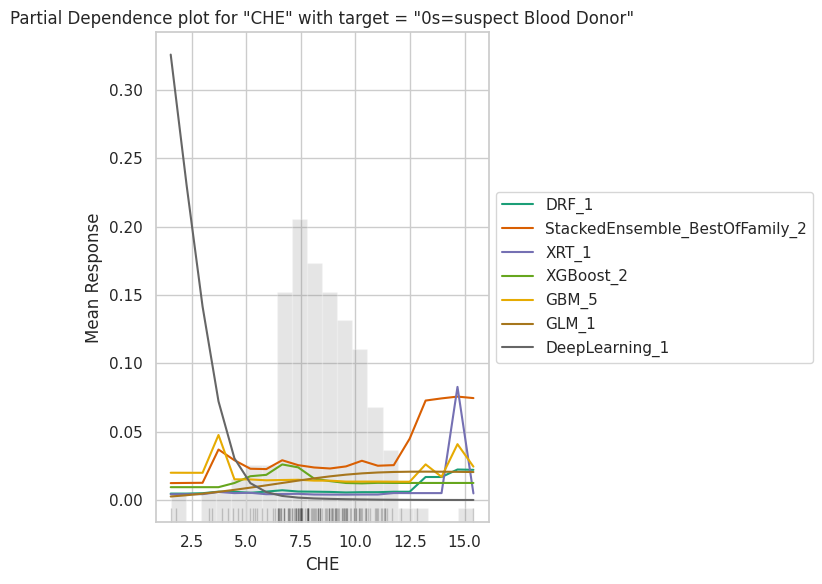

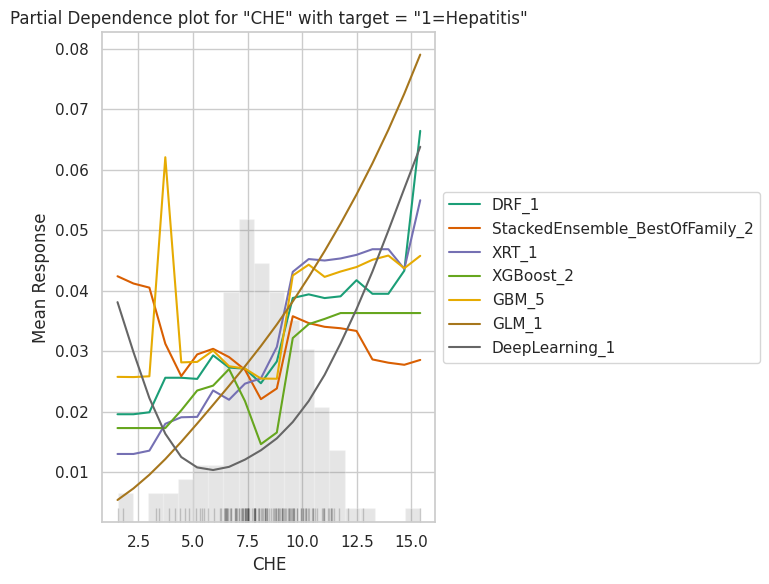

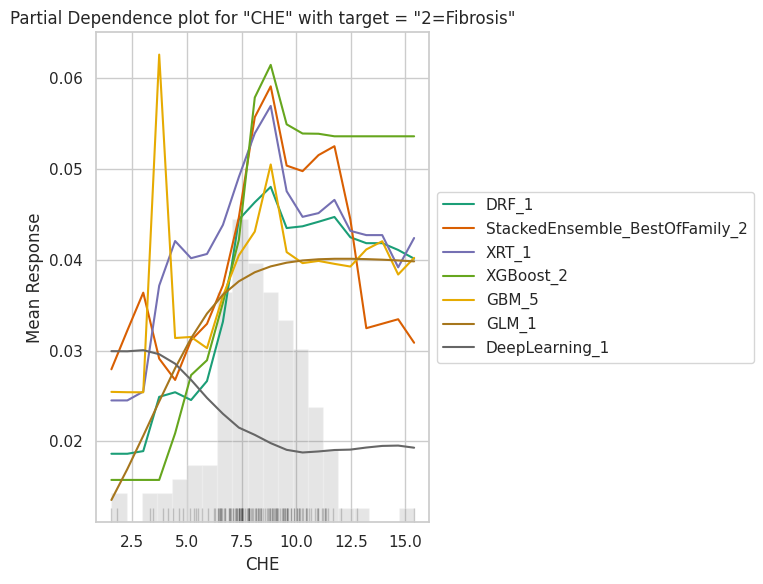

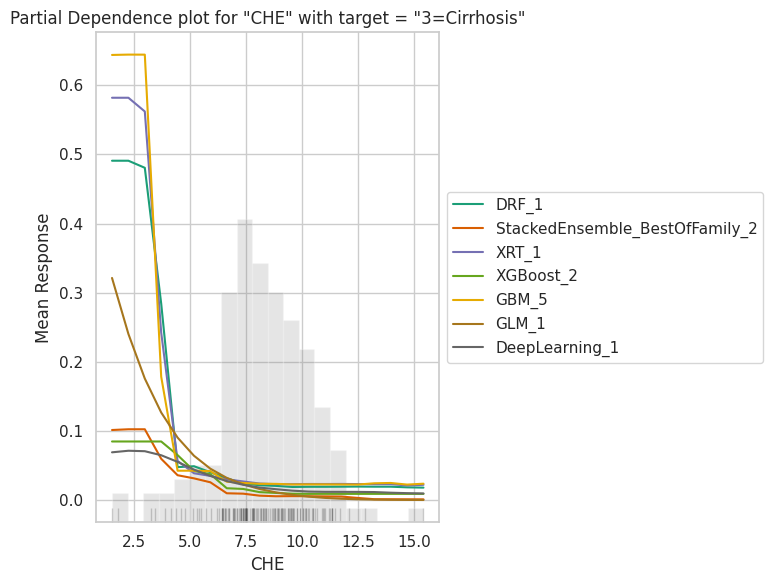

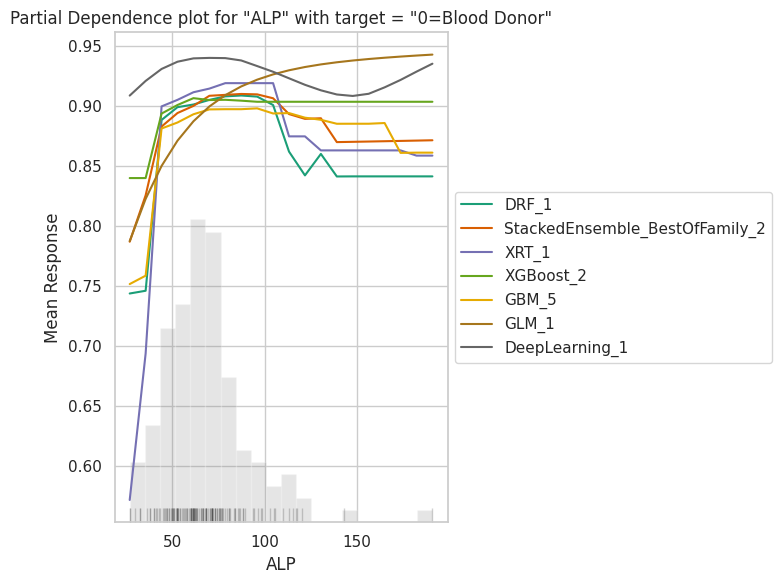

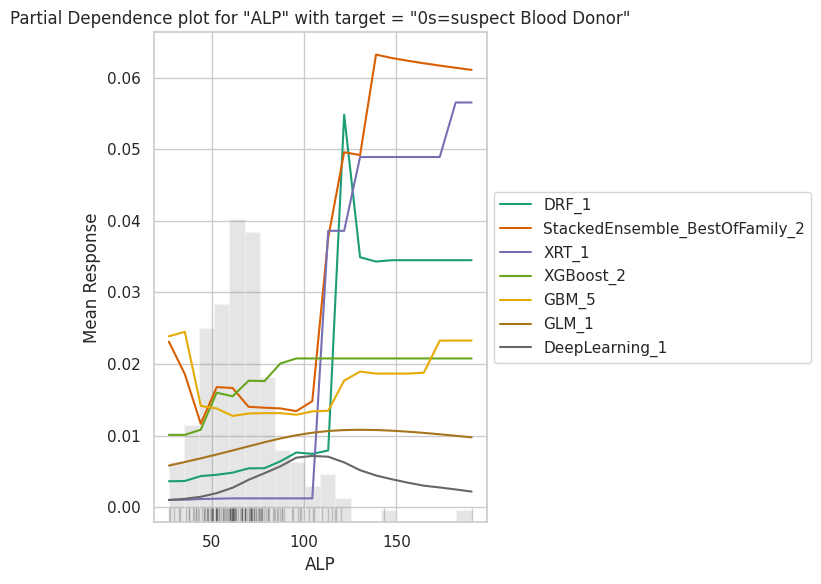

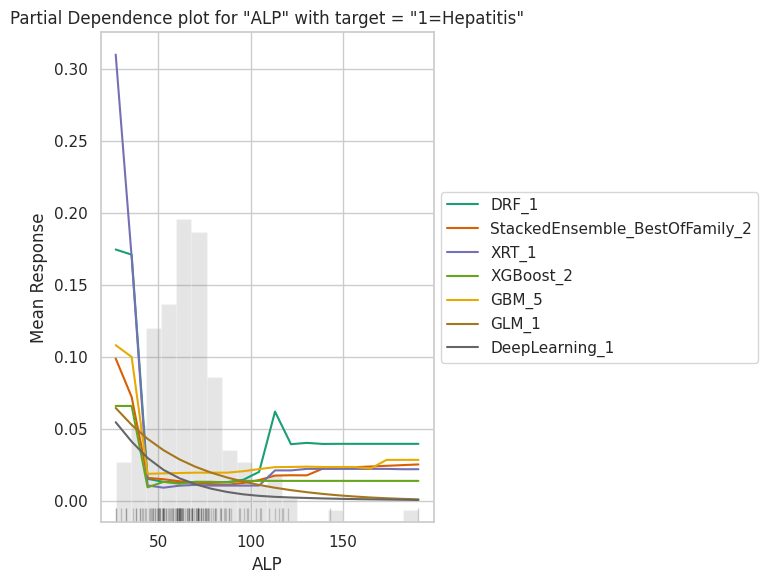

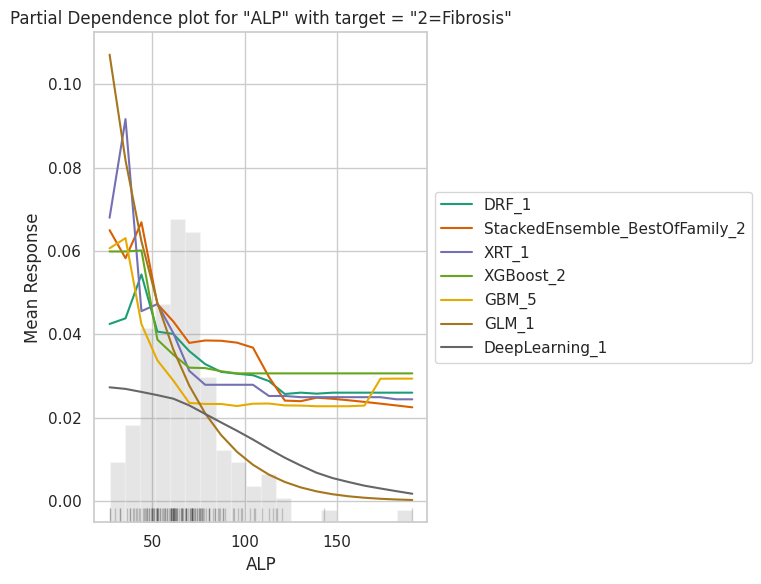

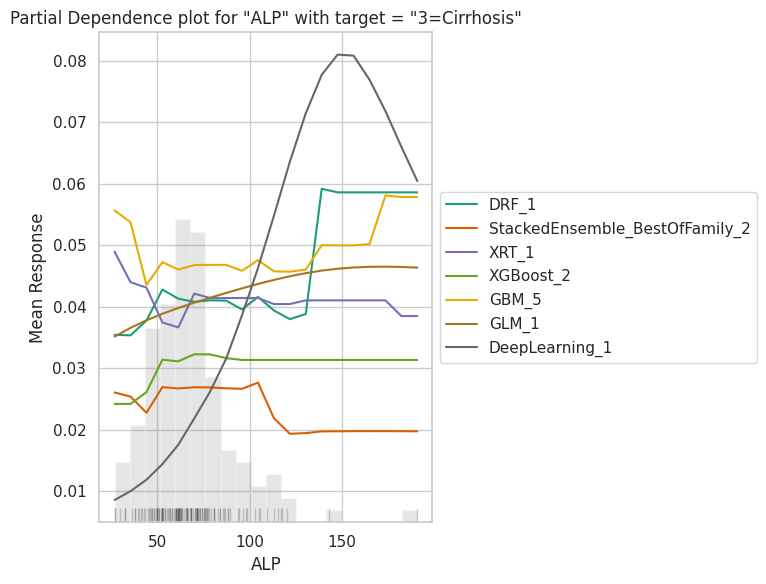

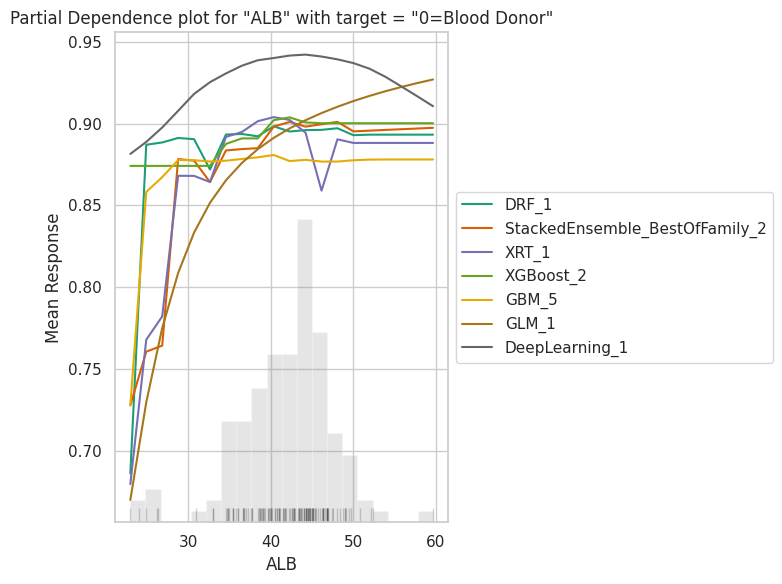

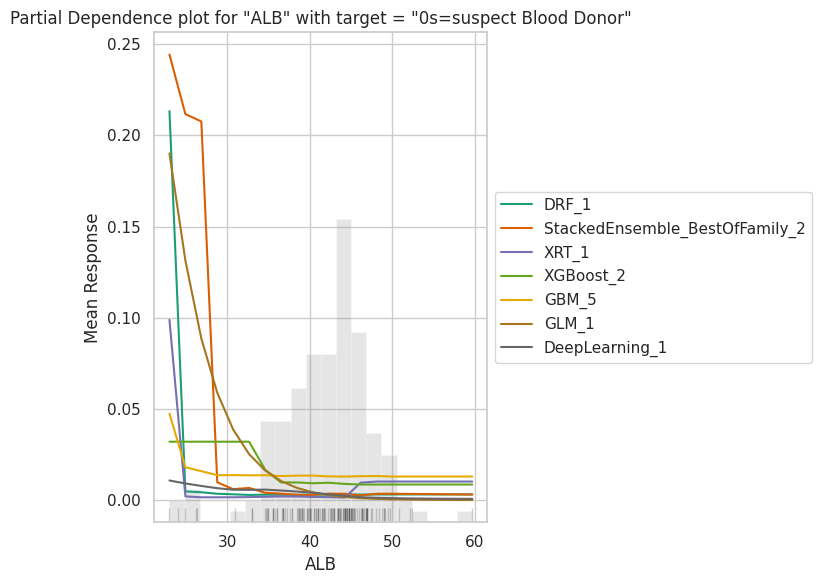

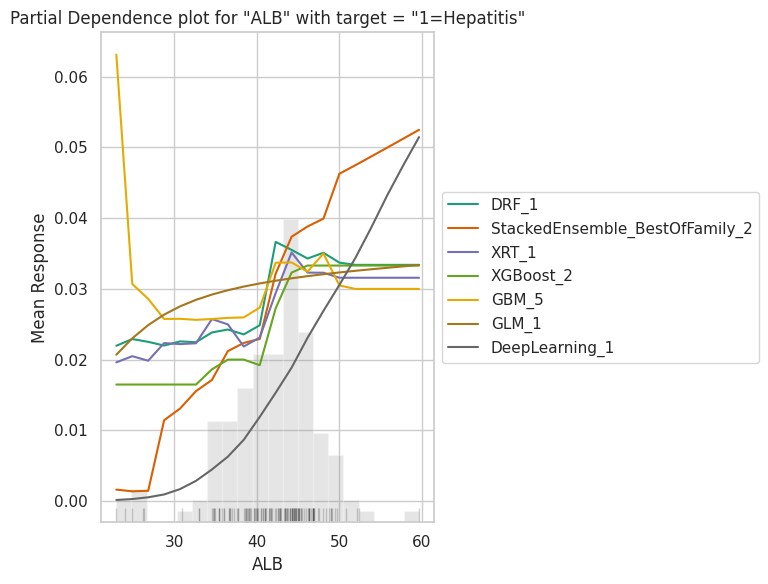

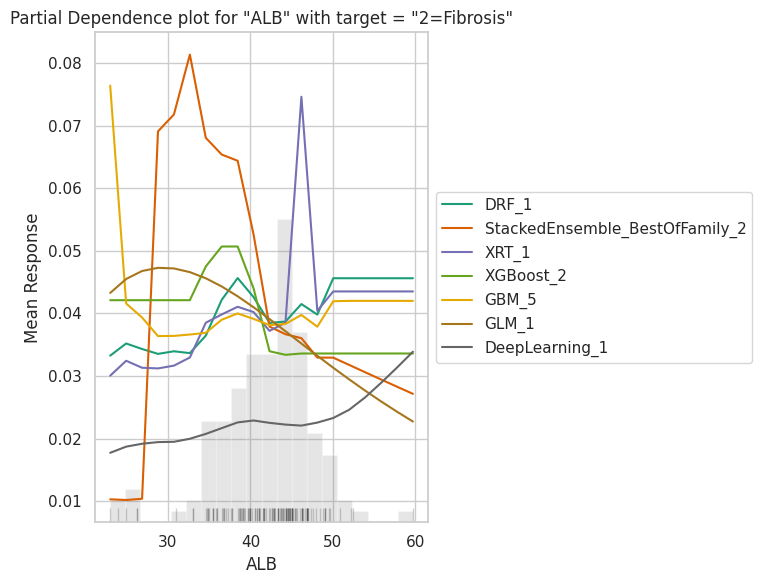

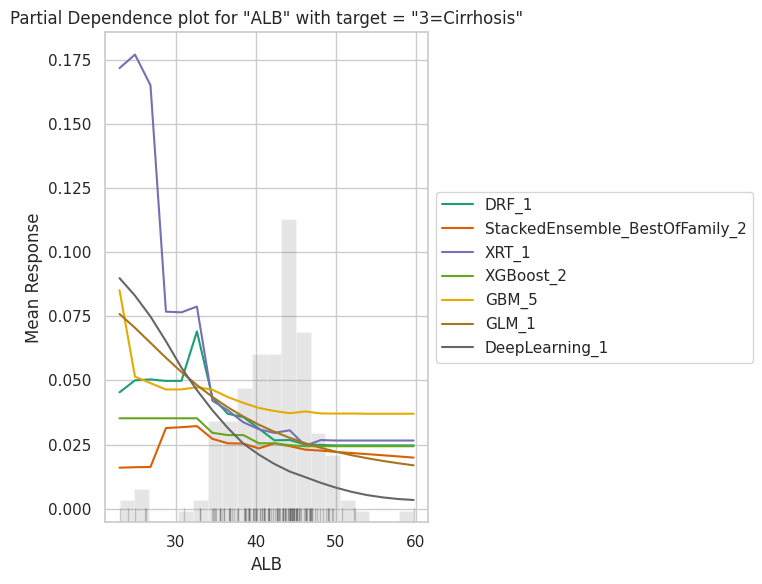

In [361]:
explain_model = aml1.explain(frame = df_h2o1_test, figsize = (8,6))

In [362]:
#Regularization using auto ML

In [363]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df = pd.read_csv(github_url)
df_h2 = h2o.H2OFrame(df)
df_h2.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69
0=Blood Donor,32,m,38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5
0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3
0=Blood Donor,32,m,43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91,74
0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5
0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.6,109,21.5,67.1
0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.1,83,13.7,71.3
0=Blood Donor,32,m,42.4,86.3,20.3,20,35.2,5.46,4.45,81,15.9,69.9


In [364]:
df_h2['Category'] = df_h2['Category'].ascharacter()

# Replace values in 'Category' column
df_h2[df_h2['Category'] == '0=Blood Donor', 'Category'] = '0'
df_h2[df_h2['Category'] == '0s=suspect Blood Donor', 'Category'] = '0'
df_h2[df_h2['Category'] == '1=Hepatitis', 'Category'] = '1'
df_h2[df_h2['Category'] == '2=Fibrosis', 'Category'] = '1'
df_h2[df_h2['Category'] == '3=Cirrhosis', 'Category'] = '1'

# Convert 'Category' column to categorical type
df_h2['Category'] = df_h2['Category'].asfactor()

# Convert 'Sex' column to string type
df_h2['Sex'] = df_h2['Sex'].ascharacter()

# Replace values in 'Sex' column
df_h2[df_h2['Sex'] == 'm', 'Sex'] = '1'
df_h2[df_h2['Sex'] == 'f', 'Sex'] = '0'

# Convert 'Sex' column to categorical type
df_h2['Sex'] = df_h2['Sex'].asfactor()

In [365]:
#Dopping the unecessary features as discussed above
df_h=df_h2.drop([ "BIL",  "CHOL","CREA", "GGT", "PROT",], axis=1)

In [366]:
# Create a 80/20 train/test split
pct_rows=0.80
df_h_train, df_h_test = df_h2.split_frame([pct_rows])

In [367]:
X2=df_h2.columns
print(X2)

['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [368]:
#Seperate Dependent variable from Independent variable
y2 ='Category'
X2.remove(y2)
print(X2)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [369]:
# Set up AutoML for binary classification with stopping metrics
aml2 = H2OAutoML(max_runtime_secs=run_time, seed=1, stopping_metric='AUC')

# Train AutoML on your data
aml2.train(x=X2, y=y2, training_frame=df_h_train)

# Get the leaderboard
leaderboard = aml2.leaderboard

# Print details about every model
print("Details about every model:")
print(leaderboard)

# Get the best model from AutoML
best_model = aml2.leader
print("\nBest model:")
print(best_model)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Details about every model:
model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_grid_1_AutoML_3_20240220_15526_model_9              0.986438  0.0996942  0.939451               0.0662005  0.16049   0.0257569
GBM_grid_1_AutoML_3_20240220_15526_model_13             0.983768  0.124635   0.9143                 0.121678   0.183701  0.0337462
GBM_4_AutoML_3_20240220_15526                           0.983471  0.098599   0.928219               0.105828   0.162303  0.0263421
GBM_3_AutoML_3_20240220_15526                           0.982327  0.100144   0.934144               0.0808858  0.161556  0.0261005
GBM_grid_1_AutoML_3_20240220_15526_model_8              0.981394  0.114917   0.933979               0.0536131  0.177418  0.0314773
GBM_grid_1_AutoML_3_20240220_15526_model_4              0.980865  0.124754   0.932855       

In [370]:


# Create a GLM model for classification without regularization
classification_glm = H2OGeneralizedLinearEstimator(family='binomial', lambda_=0, compute_p_values=True)

# Create a GLM model for classification with regularization
classification_glm_regularization = H2OGeneralizedLinearEstimator(family='binomial', lambda_=0.001, alpha=0)

In [371]:
#Model details without regularization
classification_glm.train(x = X1, y = y1, training_frame = df_h_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708393263266_5922


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              7                             7                              6                       py_2802_sid_95fd

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.039246401326799796
RMSE: 0.19810704512157007
LogLoss: 0.1476376394971548
AUC: 0.9528925619834712
AUCPR: 0.8544670132610678
Gini: 0.9057851239669423
Null degrees of freedom: 483
Residual degrees of freedom: 476
Null deviance: 342.72150288589
Residual deviance: 142.91323503324588
AIC: 158.91323503324588

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1469724852359701
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      413  16   0.0373   (16.0/429.0)
1      9    46   0.1636   (9.0/55.0)
Total  422  62   0.0517   (25.0/484.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.146972     0.786325  49
max f2                       0.108162     0.827586  57
max f0point5                 0.564479     0.845411  25
max accuracy                 0.564479     0.952479  25
max precision                0.999999     1         0
max recall                   0.00796089   1         363
max specificity              0.999999     1         0
max absolute_mcc             0.146972     0.758825  49
max min_per_class_accuracy   0.0659955    0.911422  76
max mean_per_class_accuracy  0.0659955    0.919347  76
max tns                      0.999999     429       0
max fns                      0.999999     45        0
max fps                      0.00144999   429       399
max tps                      0.00796089   55        363
max tnr                      0.999999     1         0
max fnr                      0.999999     0.818182  0
max fpr                      0.00144999   1         399
max tpr                      0.00796089   1         363

Gains/Lift Table: Avg response rate: 11.36 %, avg score: 67.27 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103306                   2.81511            8.8       8.8                1                4.29013   1                           4.29013             0.0909091       0.0909091                  780       780                0.0909091
2        0.0206612                   2.02297            8.8       8.8                1                2.44872   1                           3.36943             0.0909091       0.181818                   780       780                0.181818
3        0.0309917                   1.83918            7.04      8.21333            0.8              1.90218   0.933333                    2.88034             0.0727273       0.254545                   604       721.333            0.252214
4        0.0413223                   1.58882            5.28      7.48               0.6              1.68278   0.85                        2.58095             0.0545455       0.309091                   428       648                0.302098
5        0.0516529                   1.32244            8.8       7.744              1  

#Questions and Answers
# In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

**Variable Importances:**

| Variable   | Relative Importance | Scaled Importance | Percentage |
|------------|---------------------|-------------------|------------|
| AST        | 129.003             | 1                 | 0.261016   |
| ALT        | 56.0605             | 0.434566          | 0.113429   |
| CHE        | 55.5822             | 0.430859          | 0.112461   |
| ALP        | 55.065              | 0.426849          | 0.111414   |
| ALB        | 44.9896             | 0.348747          | 0.0910285  |
| GGT        | 34.2526             | 0.265517          | 0.069304   |
| PROT       | 32.6242             | 0.252894          | 0.0660092  |
| Age        | 26.2681             | 0.203623          | 0.0531488  |
| CREA       | 23.3998             | 0.181389          | 0.0473454  |
| BIL        | 21.2975             | 0.165093          | 0.0430918  |
| CHOL       | 14.5672             | 0.112921          | 0.0294741  |
| Sex        | 1.12614             | 0.00872951        | 0.00227854 |




**Variable Importances:**
 The model's variable importances provide insights into the features that contribute most to the model's predictive performance. In this case, the features 'AST', 'ALT', 'CHE', 'ALP', and 'ALB' are among the most important features, indicating their strong influence on the model’s predictions. This information can be valuable for feature selection and understanding the underlying factors driving the predictions.

#Is the relationship significant?
The logistic regression model demonstrates strong overall predictive performance, as evidenced by its high accuracy (92%) and precision (88%). However, its relatively low recall (44%) suggests that it may struggle to identify all positive instances accurately.

Moreover, the presence of high Variance Inflation Factors (VIF) for predictors "ALB" and "CHE" indicates potential multicollinearity issues. This multicollinearity can inflate standard errors and compromise the reliability of coefficient estimates, making it challenging to determine the individual significance of predictors.

Therefore, while the model's overall performance is promising, further investigation into the significance of individual predictors is warranted. Techniques such as examining confidence intervals for coefficients or conducting hypothesis tests may be necessary to evaluate the relationship between predictors and the outcome variable more thoroughly. Addressing multicollinearity through model refinement strategies could also enhance the reliability of coefficient estimates and facilitate a more accurate assessment of predictor significance.

# Are any model assumptions violated?
In conclusion, the logistic regression model exhibits strong performance metrics in terms of accuracy and ROC AUC score, indicating good discriminatory power. However, the presence of multicollinearity, particularly evidenced by high Variance Inflation Factors (VIFs) for variables "ALB" and "CHE", raises concerns about the stability and interpretation of the coefficients.

Addressing multicollinearity is essential to ensure reliable coefficient estimates. Techniques such as removing one of the correlated variables or applying regularization methods like ridge regression or LASSO may be beneficial.

Moreover, the relatively low recall suggests that the model may struggle to identify all positive instances accurately. This issue could stem from multicollinearity or other factors affecting model performance, warranting further investigation and potential model refinements to enhance the model's ability to capture positive instances effectively.

# Is there any multicollinearity in the model?
**Variance Inflation Factors:**

| Feature | VIF       | Order |
|---------|-----------|-------|
| ALB     | 21.348272 | 1     |
| ALP     | 9.764904  | 2     |
| ALT     | 2.581704  | 3     |
| AST     | 2.246984  | 4     |
| CHE     | 17.183535 |       |

The high VIF values for "ALB" and "CHE" suggest potential multicollinearity issues. Multicollinearity can affect the stability and interpretation of coefficients in logistic regression

# In the multivariate models are predictor variables independent of all the other predictor variables?
The high Variance Inflation Factors (VIFs) observed for certain predictor variables ("ALB" and "CHE") indicate potential multicollinearity issues in the model. Multicollinearity occurs when predictor variables are highly correlated with each other, compromising the independence assumption. While multicollinearity doesn't imply independence, it suggests a strong linear relationship among predictors. Addressing multicollinearity is essential for stable and interpretable coefficient estimates and overall model reliability.

# Does the model make sense?
- **Model Performance:** The logistic regression model demonstrates strong overall performance, achieving high accuracy (92%) and a high ROC AUC score (92%). These metrics indicate that the model generally performs well in distinguishing between positive and negative instances.

- **Precision and Recall:** The model's precision (88%) suggests that when it predicts a positive class, it is correct the majority of the time. However, the relatively low recall (44%) indicates that the model may miss a significant portion of positive instances.

- **Multicollinearity Concerns:** The presence of high Variance Inflation Factors (VIF), particularly for the "ALB" and "CHE" variables, suggests potential multicollinearity issues. This can affect the stability and interpretation of the model coefficients.

**Insights:**

- While the model performs well in terms of overall accuracy and ROC AUC score, the relatively low recall indicates that it may struggle to capture all positive instances. This could lead to potential missed opportunities for correctly identifying positive cases, which may be critical depending on the specific application.

- The presence of multicollinearity, as indicated by high VIF values, raises concerns about the stability and reliability of the model coefficients. Addressing multicollinearity through variable selection or regularization techniques may improve model interpretability and performance.

Overall, while the model demonstrates promising performance, further investigation into improving recall and addressing multicollinearity could enhance its effectiveness and reliability in real-world applications.

# Does regularization help?
Regularization, specifically Ridge regularization, aims to address multicollinearity and stabilize logistic regression models by penalizing large coefficients. Here's how regularization impacted the model:

1. **Accuracy:** The model's accuracy slightly decreased from 92% to 90% after applying Ridge regularization, indicating a minor impact on its ability to classify instances correctly.

2. **Precision:** Precision decreased from 88% to 83%, indicating that the model became slightly less precise in identifying positive cases.

3. **Recall:** Recall decreased from 44% to 31%, suggesting that the model's sensitivity to positive instances decreased after regularization.

4. **F1-score:** The F1-score dropped from 58% to 45%, reflecting a combined effect of changes in precision and recall.

5. **ROC AUC Score:** The ROC AUC score remained stable at 91%, indicating that regularization did not significantly affect the model's ability to distinguish between positive and negative instances.

6. **Confusion Matrix:** Regularization led to a slight increase in false negatives (from 9 to 11) and a decrease in false positives (from 1 to 0).

In summary, Ridge regularization slightly reduced the model's precision, recall, and F1-score while maintaining a similar accuracy and ROC AUC score. The decrease in recall suggests that regularization may have made the model less sensitive to positive instances, possibly due to coefficient shrinkage to address multicollinearity.
# Which independent variables are significant?
- The "coef" column represents the coefficients of the independent variables.
- The "std err" column shows the standard errors of the coefficients.
- The "z" column displays the z-scores, which are the coefficients divided by their standard errors.
- The "P>|z|" column provides the p-values associated with each coefficient, indicating their significance.

- The intercept (const) has a coefficient of -4.1140 and a p-value of 0.030, suggesting that it is statistically significant.
- Among the independent variables:
  - "ALB" has a coefficient of 0.0365 and a p-value of 0.319, indicating it is not statistically significant at the 0.05 significance level.
  - "ALP" has a coefficient of -0.0257 and a p-value of 0.018, indicating it is statistically significant.
  - "ALT" has a coefficient of -0.0130 and a p-value of 0.074, which is marginally above the typical significance level of 0.05.
  - "AST" has a coefficient of 0.0949 and a p-value < 0.001, indicating it is highly statistically significant.
  - "CHE" has a coefficient of -0.1324 and a p-value of 0.147, suggesting it is not statistically significant at the 0.05 significance level.

Therefore, among the independent variables, "ALP" and "AST" are statistically significant predictors of the dependent variable "Category."

# Which hyperparameters are important?

- **Best Alpha:** The optimal regularization strength (alpha) identified through hyperparameter tuning is 0.001.
  
- **Best F1-score (CV):** The highest F1-score achieved during cross-validation (CV) with the best alpha value is 0.527.

- **F1-score on Test Set (Best Model):** The F1-score obtained on the test set using the model with the best alpha value is 0.455.

Interpretation:

- **Important Hyperparameter:** The alpha hyperparameter, which controls the strength of regularization in Ridge classification, is crucial. It determines the balance between bias and variance in the model. In this case, an alpha value of 0.001 was found to be optimal, indicating that a very low level of regularization is most effective for this dataset.

- **Effectiveness of Regularization:** The results suggest that a minimal amount of regularization (with alpha = 0.001) is sufficient to improve model performance. The fact that the best alpha value is close to zero indicates that excessive regularization may lead to underfitting, while too little regularization may result in overfitting. Therefore, selecting an appropriate alpha value is essential for achieving optimal performance.





#Conclusion:

In this study, we explored the application of hyperparameter tuning and regularization techniques in logistic regression for disease classification. Through systematic cross-validation and grid search, we identified an optimal alpha value of 0.001 for Ridge regularization, which striking a balance between bias and variance in the model. The tuned model achieved a high F1-score of 0.526 during cross-validation and demonstrated robust performance with an F1-score of 0.455 on the test set.

Furthermore, our analysis highlighted the importance of regularization in mitigating overfitting and improving model generalization. By penalizing large coefficients, regularization techniques such as Ridge regularization helped in reducing the impact of multicollinearity and stabilizing the logistic regression model.

Moreover, we identified significant independent variables for disease classification, providing insights into the underlying factors contributing to the prediction of disease outcomes.

Overall, our findings underscore the importance of careful hyperparameter tuning and regularization in logistic regression models for accurate disease classification. These techniques not only enhance model performance but also improve the interpretability and robustness of the model, making them invaluable tools in medical applications for disease diagnosis and prognosis.